In [1]:
library("dplyr")
library("fusca")
library("igraph")
library("scales")
library("ggplot2")
library("Seurat")
library("IRdisplay")
library("OmnipathR")
library("gprofiler2")
library("circlize")
library("RColorBrewer")
library(tidyverse)
library(viridis)
library(tidyr)
library(patchwork)
library(hrbrthemes)
library(circlize)
library(chorddiag)


Attachement du package : ‘dplyr’


Les objets suivants sont masqués depuis ‘package:stats’:

    filter, lag


Les objets suivants sont masqués depuis ‘package:base’:

    intersect, setdiff, setequal, union



Attachement du package : ‘igraph’


Les objets suivants sont masqués depuis ‘package:dplyr’:

    as_data_frame, groups, union


Les objets suivants sont masqués depuis ‘package:stats’:

    decompose, spectrum


L'objet suivant est masqué depuis ‘package:base’:

    union


Attaching SeuratObject

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attachement du package : ‘circlize’


L'objet suivant est masqu

In [2]:
load(file = "/home/adufour/work/rds_storage/FUSCA/FUSCA_lineage.RData")

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [4]:
a1 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[1])
a2 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[2])
a3 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[3])
a4 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[4])
a5 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[5])
a6 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[6])
a7 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[7])
a8 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[8])
a9 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[9])
a10 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[10])
a11 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[11])
a12 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[12])
a13 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[13])
a14 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[14])
a15 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[15])
a16 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[16])
a17 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[17])
a18 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[18])
a19 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[19])
a20 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[20])
a21 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[21])
a22 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[22])
a23 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[23])
a24 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[24])
a25 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[25])
a26 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[26])
a27 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[27])
a28 <- signaling2TF(npaths, num.pathways = 20, interaction = tumor[28])

combined <- do.call(rbind, list(a1$df, a2$df, a3$df, a4$df, a5$df, a6$df, a7$df, a8$df, a9$df, a10$df, a11$df, a12$df, a13$df, a14$df, a15$df, a16$df, a17$df, 
                                a18$df, a19$df, a20$df, a21$df, a22$df, a23$df, a24$df, a25$df, a26$df, a27$df, a28$df))

combined <- combined[complete.cases(combined), ]
combined <- combined[!duplicated(combined[c(1,11)]),]

combined$score <- log1p(combined$score)

In [5]:
color_pal <- rev(c('#A50026', '#D73027', '#F46D43', '#FDAE61', '#74ADD1', '#4575B4', '#313695'))

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”


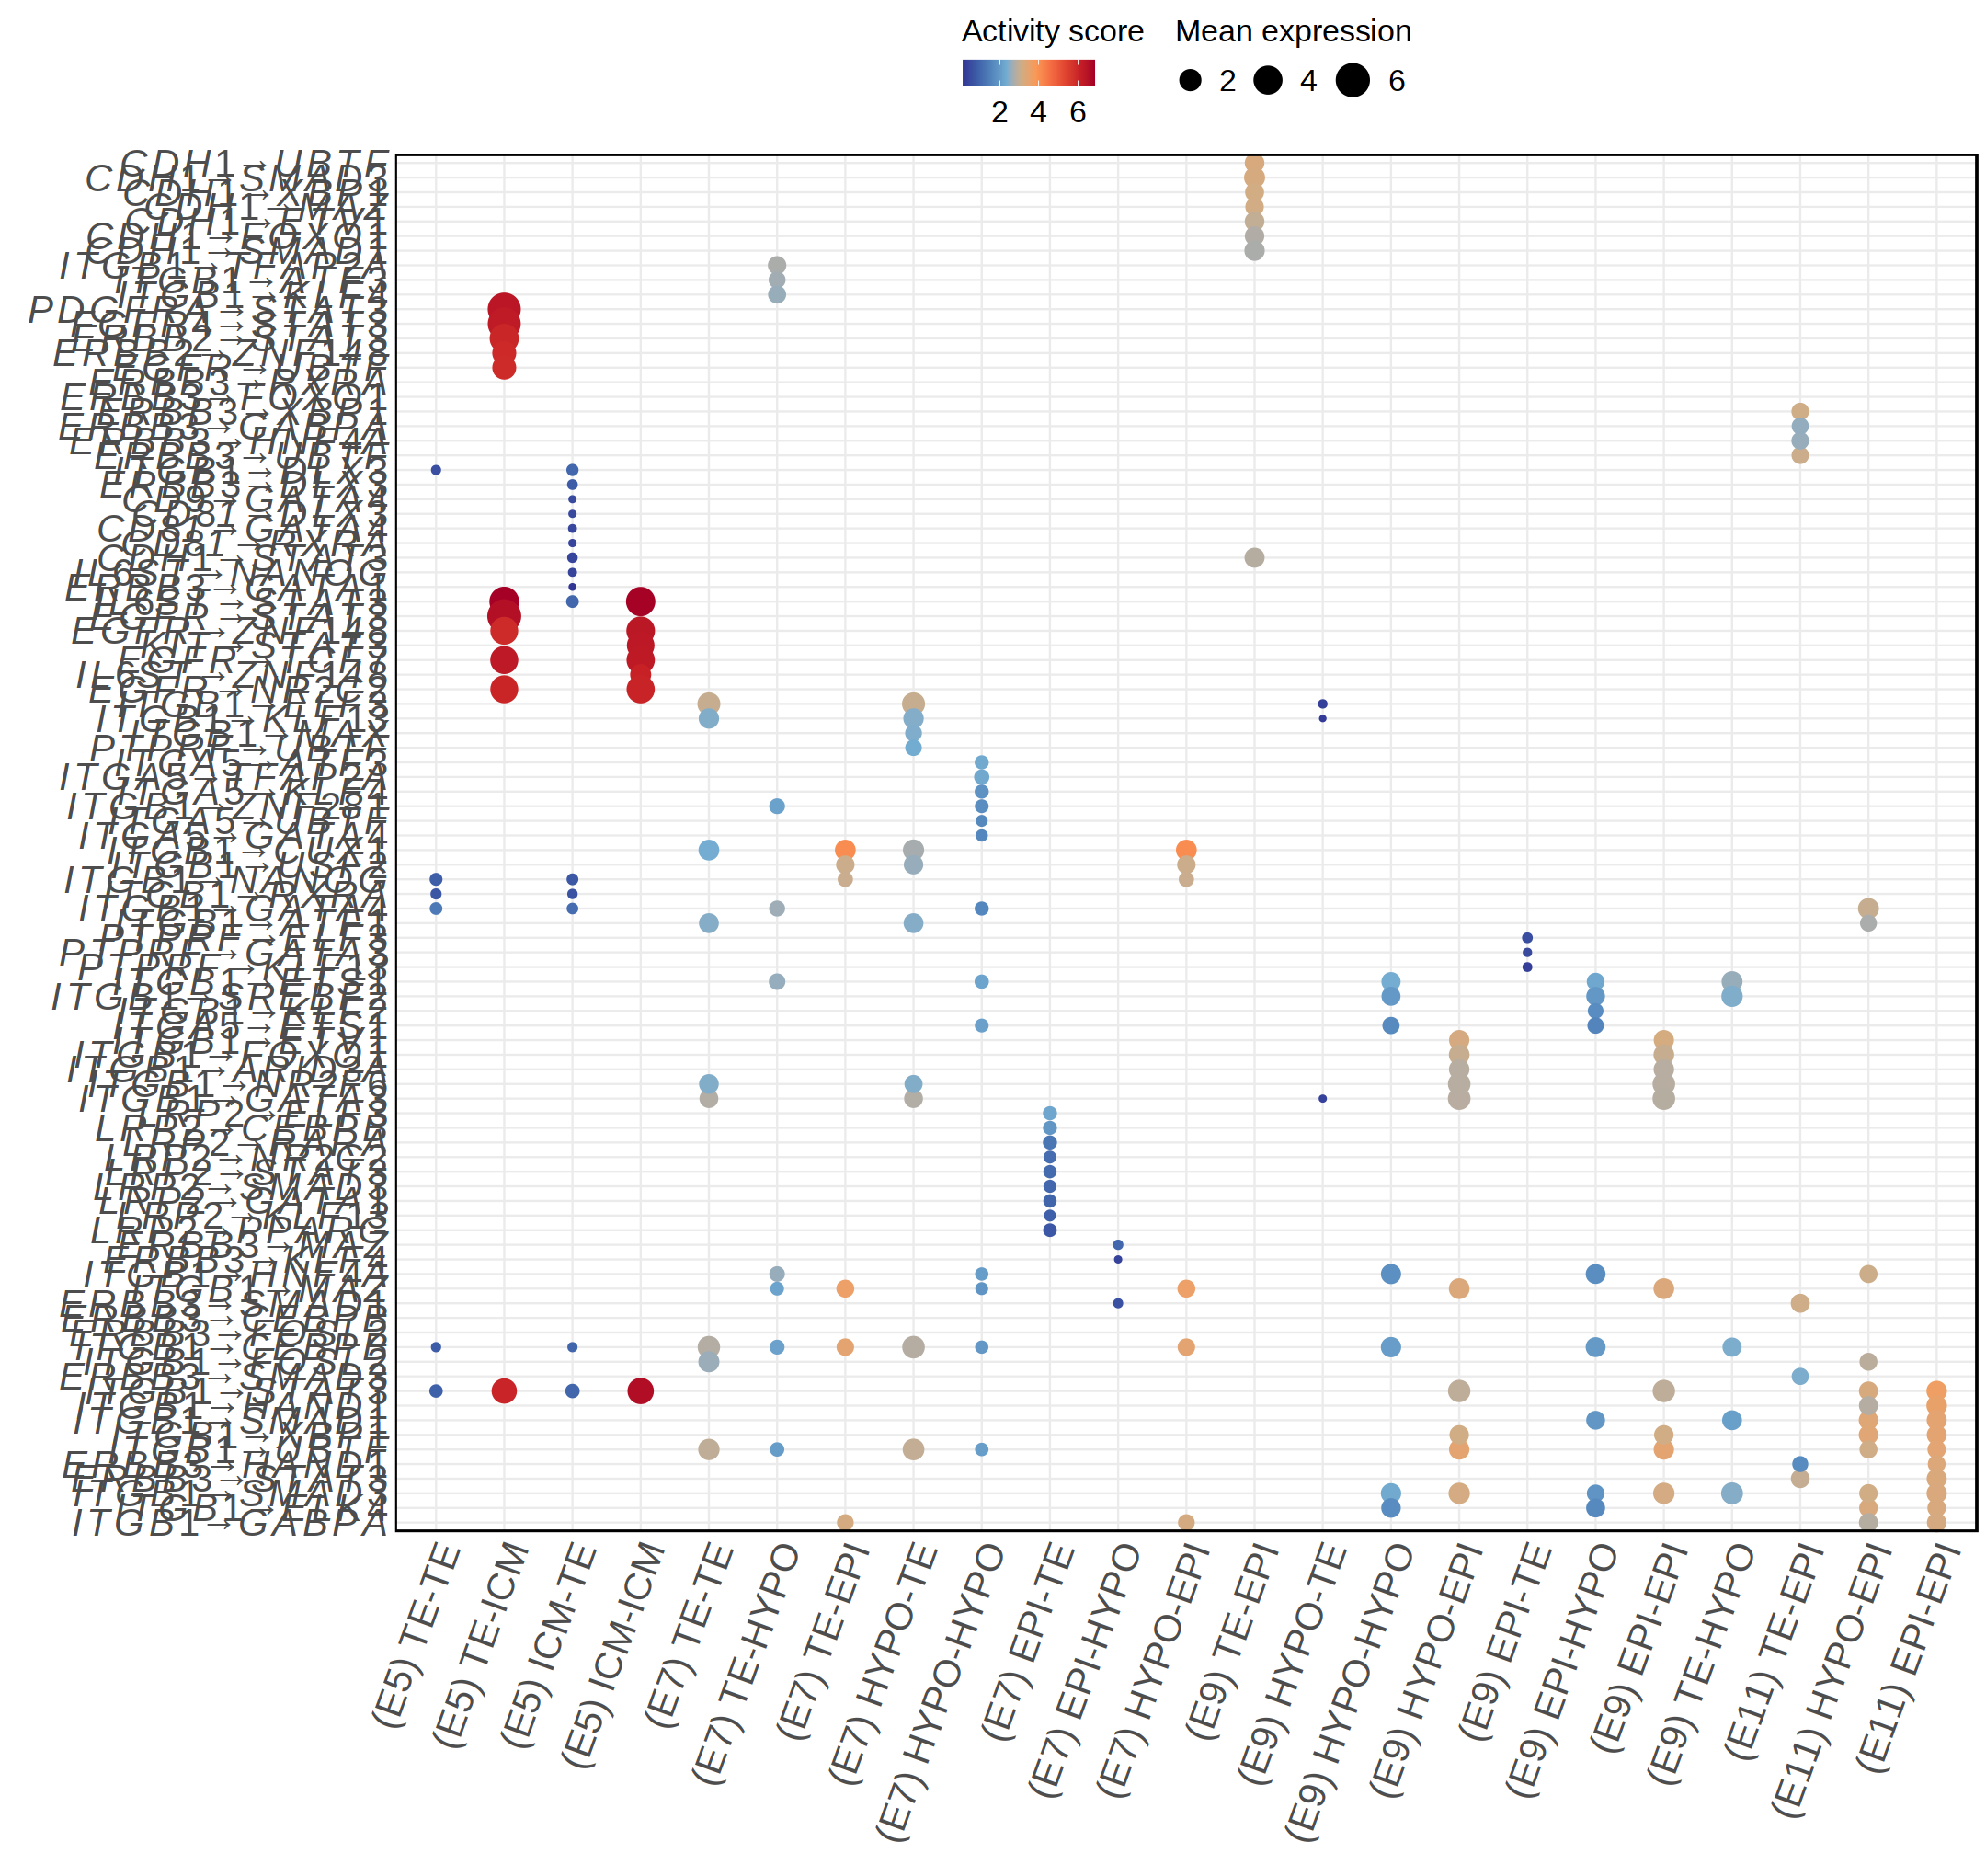

In [6]:
plot <- ggplot(combined, aes(interaction, path)) +
    geom_point(aes(colour=score, size=meanflow)) +
    scale_colour_gradientn("Activity score",colours=colorRampPalette(color_pal)(10)) +
    scale_size(name = "Mean expression", limits = c(min(combined$score), max(combined$score)), range = c(1, 10)) +
    scale_x_discrete(
    limits = rev(c('Epiblast-J11_Epiblast-J11', 'Hypoblast-J11_Epiblast-J11', 'Trophectoderm-J11_Epiblast-J11',
    'Trophectoderm-J9_Hypoblast-J9', 'Epiblast-J9_Epiblast-J9', 'Epiblast-J9_Hypoblast-J9', 'Epiblast-J9_Trophectoderm-J9', 'Hypoblast-J9_Epiblast-J9', 'Hypoblast-J9_Hypoblast-J9', 'Hypoblast-J9_Trophectoderm-J9', 'Trophectoderm-J9_Epiblast-J9',
    'Hypoblast-J7_Epiblast-J7', 'Epiblast-J7_Hypoblast-J7', 'Epiblast-J7_Trophectoderm-J7', 'Hypoblast-J7_Hypoblast-J7', 'Hypoblast-J7_Trophectoderm-J7',
    'Trophectoderm-J7_Epiblast-J7', 'Trophectoderm-J7_Hypoblast-J7', 'Trophectoderm-J7_Trophectoderm-J7',
    'ICM-J5_ICM-J5', 'ICM-J5_Trophectoderm-J5', 'Trophectoderm-J5_ICM-J5', 'Trophectoderm-J5_Trophectoderm-J5')),
    labels = rev(c('(E11) EPI-EPI', '(E11) HYPO-EPI', '(E11) TE-EPI', '(E9) TE-HYPO', '(E9) EPI-EPI', '(E9) EPI-HYPO', '(E9) EPI-TE', '(E9) HYPO-EPI',
                   '(E9) HYPO-HYPO', '(E9) HYPO-TE', '(E9) TE-EPI', '(E7) HYPO-EPI', '(E7) EPI-HYPO', '(E7) EPI-TE', '(E7) HYPO-HYPO', '(E7) HYPO-TE',
                   '(E7) TE-EPI', '(E7) TE-HYPO', '(E7) TE-TE', '(E5) ICM-ICM', '(E5) ICM-TE', '(E5) TE-ICM', '(E5) TE-TE'))
    ) +
    scale_y_discrete(
    limits = c('ITGB1->...->GABPA', 'ITGB1->...->ELK4', 'ITGB1->...->SMAD3', 'ERBB3->...->STAT3', 'ERBB3->...->HAND1', 'ITGB1->...->UBTF', 'ITGB1->...->XBP1',
               'ITGB1->...->SMAD1', 'ITGB1->...->HAND1', 'ITGB1->...->STAT3', 'ERBB3->...->SMAD3', 'ITGB1->...->FOSL2', 'ITGB1->...->CEBPB',
               'ERBB3->...->FOSL2', 'ERBB3->...->CEBPB', 'ERBB3->...->SMAD1', 'ITGB1->...->MAZ', 'ITGB1->...->HNF4A', 'ERBB3->...->KLF4',
               'ERBB3->...->MAZ', 'LRP2->...->PPARG', 'LRP2->...->KLF13', 'LRP2->...->GATA1', 'LRP2->...->SMAD3', 'LRP2->...->STAT3', 'LRP2->...->NR2C2',
               'LRP2->...->RARA', 'LRP2->...->CEBPB', 'LRP2->...->ELF3', 'ITGB1->...->GATA3', 'ITGB1->...->NR2F6', 'ITGB1->...->ARID3A', 'ITGB1->...->FOXO1',
               'ITGB1->...->ETV1', 'ITGA5->...->ETS1', 'ITGB1->...->KLF2', 'ITGB1->...->SREBF2', 'ITGB1->...->ETS1', 'PTPRF->...->KLF13', 'PTPRF->...->GATA3',
               'PTPRF->...->ELF3', 'ITGB1->...->ATF1', 'ITGB1->...->GATA4', 'ITGB1->...->RXRA', 'ITGB1->...->NANOG', 'ITGB1->...->USF2', 'ITGB1->...->CUX1',
               'ITGA5->...->GATA4', 'ITGA5->...->UBTF', 'ITGB1->...->ZNF281', 'ITGA5->...->KLF4', 'ITGA5->...->TFAP2A', 'ITGA5->...->ATF3',
               'PTPRF->...->UBTF', 'ITGB1->...->MAX', 'ITGB1->...->KLF13', 'ITGB1->...->ELF3', 'EGFR->...->NR2C2', 'IL6ST->...->ZNF148', 'EGFR->...->TCF7',
               'KIT->...->STAT3', 'EGFR->...->ZNF148', 'EGFR->...->STAT3', 'IL6ST->...->STAT3', 'ERBB3->...->GATA1', 'IL6ST->...->NANOG', 'CDH1->...->STAT3',
               'CD81->...->RXRA', 'CD81->...->GATA4', 'CD81->...->DLX3', 'CD9->...->GATA4', 'ERBB3->...->DLX3', 'ITGB1->...->DLX3', 'ERBB3->...->UBTF',
               'ERBB3->...->HNF4A', 'ERBB3->...->GABPA', 'ERBB3->...->XBP1', 'ERBB3->...->FOXO1', 'ERBB3->...->RXRA', 'EGFR->...->UBTF', 'ERBB2->...->ZNF148',
               'ERBB2->...->STAT3', 'FGFR4->...->STAT3', 'PDGFRA->...->STAT3', 'ITGB1->...->KLF4', 'ITGB1->...->ATF3', 'ITGB1->...->TFAP2A',
               'CDH1->...->SMAD1', 'CDH1->...->FOXO1', 'CDH1->...->ETV1', 'CDH1->...->MAZ', 'CDH1->...->XBP1', 'CDH1->...->SMAD3', 'CDH1->...->UBTF'),
    labels = c(expression(paste(italic(ITGB1), "→", italic(GABPA))), expression(paste(italic(ITGB1), "→", italic(ELK4))), expression(paste(italic(ITGB1), "→", italic(SMAD3))), expression(paste(italic(ERBB3), "→", italic(STAT3))),
               expression(paste(italic(ERBB3), "→", italic(HAND1))), expression(paste(italic(ITGB1), "→", italic(UBTF))), expression(paste(italic(ITGB1), "→", italic(XBP1))), expression(paste(italic(ITGB1), "→", italic(SMAD1))),
               expression(paste(italic(ITGB1), "→", italic(HAND1))), expression(paste(italic(ITGB1), "→", italic(STAT3))), expression(paste(italic(ERBB3), "→", italic(SMAD3))), expression(paste(italic(ITGB1), "→", italic(FOSL2))),
               expression(paste(italic(ITGB1), "→", italic(CEBPB))), expression(paste(italic(ERBB3), "→", italic(FOSL2))), expression(paste(italic(ERBB3), "→", italic(CEBPB))), expression(paste(italic(ERBB3), "→", italic(SMAD1))),
               expression(paste(italic(ITGB1), "→", italic(MAZ))), expression(paste(italic(ITGB1), "→", italic(HNF4A))), expression(paste(italic(ERBB3), "→", italic(KLF4))),
               expression(paste(italic(ERBB3), "→", italic(MAZ))), expression(paste(italic(LRP2), "→", italic(PPARG))), expression(paste(italic(LRP2), "→", italic(KLF13))), expression(paste(italic(LRP2), "→", italic(GATA1))),
               expression(paste(italic(LRP2), "→", italic(SMAD3))), expression(paste(italic(LRP2), "→", italic(STAT3))), expression(paste(italic(LRP2), "→", italic(NR2C2))), expression(paste(italic(LRP2), "→", italic(RARA))), 
               expression(paste(italic(LRP2), "→", italic(CEBPB))), expression(paste(italic(LRP2), "→", italic(ELF3))), expression(paste(italic(ITGB1), "→", italic(GATA3))), expression(paste(italic(ITGB1), "→", italic(NR2F6))),
               expression(paste(italic(ITGB1), "→", italic(ARID3A))), expression(paste(italic(ITGB1), "→", italic(FOXO1))), expression(paste(italic(ITGB1), "→", italic(ETV1))), expression(paste(italic(ITGA5), "→", italic(ETS1))),
               expression(paste(italic(ITGB1), "→", italic(KLF2))), expression(paste(italic(ITGB1), "→", italic(SREBF2))), expression(paste(italic(ITGB1), "→", italic(ETS1))), expression(paste(italic(PTPRF), "→", italic(KLF13))),
               expression(paste(italic(PTPRF), "→", italic(GATA3))), expression(paste(italic(PTPRF), "→", italic(ELF3))), expression(paste(italic(ITGB1), "→", italic(ATF1))), expression(paste(italic(ITGB1), "→", italic(GATA4))),
               expression(paste(italic(ITGB1), "→", italic(RXRA))), expression(paste(italic(ITGB1), "→", italic(NANOG))), expression(paste(italic(ITGB1), "→", italic(USF2))), expression(paste(italic(ITGB1), "→", italic(CUX1))),
               expression(paste(italic(ITGA5), "→", italic(GATA4))), expression(paste(italic(ITGA5), "→", italic(UBTF))), expression(paste(italic(ITGB1), "→", italic(ZNF281))), expression(paste(italic(ITGA5), "→", italic(KLF4))),
               expression(paste(italic(ITGA5), "→", italic(TFAP2A))), expression(paste(italic(ITGA5), "→", italic(ATF3))), expression(paste(italic(PTPRF), "→", italic(UBTF))), expression(paste(italic(ITGB1), "→", italic(MAX))),
               expression(paste(italic(ITGB1), "→", italic(KLF13))), expression(paste(italic(ITGB1), "→", italic(ELF3))), expression(paste(italic(EGFR), "→", italic(NR2C2))), expression(paste(italic(IL6ST), "→", italic(ZNF148))),
               expression(paste(italic(EGFR), "→", italic(TCF7))), expression(paste(italic(KIT), "→", italic(STAT3))), expression(paste(italic(EGFR), "→", italic(ZNF148))), expression(paste(italic(EGFR), "→", italic(STAT3))),
               expression(paste(italic(IL6ST), "→", italic(STAT3))), expression(paste(italic(ERBB3), "→", italic(GATA1))), expression(paste(italic(IL6ST), "→", italic(NANOG))), expression(paste(italic(CDH1), "→", italic(STAT3))),
               expression(paste(italic(CD81), "→", italic(RXRA))), expression(paste(italic(CD81), "→", italic(GATA4))), expression(paste(italic(CD81), "→", italic(DLX3))), expression(paste(italic(CD9), "→", italic(GATA4))),
               expression(paste(italic(ERBB3), "→", italic(DLX3))), expression(paste(italic(ITGB1), "→", italic(DLX3))), expression(paste(italic(ERBB3), "→", italic(UBTF))), expression(paste(italic(ERBB3), "→", italic(HNF4A))),
               expression(paste(italic(ERBB3), "→", italic(GABPA))), expression(paste(italic(ERBB3), "→", italic(XBP1))), expression(paste(italic(ERBB3), "→", italic(FOXO1))), expression(paste(italic(ERBB3), "→", italic(RXRA))),
               expression(paste(italic(EGFR), "→", italic(UBTF))), expression(paste(italic(ERBB2), "→", italic(ZNF148))), expression(paste(italic(ERBB2), "→", italic(STAT3))), expression(paste(italic(FGFR4), "→", italic(STAT3))),
               expression(paste(italic(PDGFRA), "→", italic(STAT3))), expression(paste(italic(ITGB1), "→", italic(KLF4))), expression(paste(italic(ITGB1), "→", italic(ATF3))), expression(paste(italic(ITGB1), "→", italic(TFAP2A))),
               expression(paste(italic(CDH1), "→", italic(SMAD1))), expression(paste(italic(CDH1), "→", italic(FOXO1))), expression(paste(italic(CDH1), "→", italic(ETV1))), expression(paste(italic(CDH1), "→", italic(MAZ))),
               expression(paste(italic(CDH1), "→", italic(XBP1))), expression(paste(italic(CDH1), "→", italic(SMAD3))), expression(paste(italic(CDH1), "→", italic(UBTF))))
    ) +
    theme_bw() +
    xlab("") +
    ylab("") +
    theme(legend.position="top",
        axis.text.x = element_text(size = 25, angle = 70, hjust = 1),
        axis.text.y = element_text(size = 25),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20),
        panel.grid.minor = element_blank(),
        axis.ticks=element_blank(),
        panel.border=element_rect(fill = NA, colour=alpha('black', 1),size=1)) +
    guides(colour = guide_colourbar(title.position="top", title.hjust = 0.5), size = guide_legend(title.position="top", title.hjust = 0.5))
plot

In [7]:
ggsave("/home/adufour/work/notebook/plots/interactions/FUSCA/fusca_lineage.svg", plot, height = 35, width = 12)

Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”
